# Visual Storytelling Part 2: Capital Metro Data

Instructions Link: 
https://github.com/dpuelz/STA380/tree/master/exercises

### Overall Summary of Findings (please scroll down for plots and captions)

* The majority of boardings happen on weekday afternoons and the majority of alightings happen on weekday mornings. This coincides with UT students and employees going to and from school/work.
* For some reason, boardings are only common in the afternoons (not mornings) and alightings are only common in the mornings (not afternoons). This is unusual, as we would assume that if someone is boarding the bus, they are also alighting within a similar timeframe.
* Ridership is stable among 40-80 F days, but spikes from 80-95 F days. Below 40F and above 95F, ridership drops significantly.
* Ridership is stable across the 3 months of the dataset (Sep, Oct, Nov 2018). In general, more people board than alight. 
* I wanted to investigate if ridership increased on special occasions, such as UT football home game days and major holidays. I added a True/False column for home game days and holidays. Possibly due to limited data, there was no major difference between ridership on regular days vs. game days or holidays. There were actually less people boarding on those occasions. Since there are only a few of those special occasion days in a single fall season, more data from prior and future years is needed to make any conclusions on whether game days/holidays impacts ridership. 

In [29]:
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


In [30]:
cap = pd.read_csv('/Users/vishwapatel/Desktop/STA 380 - Intro to ML/Part 2 Unsupervised Learning Class/capmetro_UT.csv')

cap['timestamp'] = pd.to_datetime(cap['timestamp'])

# Set the timestamp as the index
cap.set_index('timestamp', inplace=True)
cap[:3]

,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend
timestamp,,,,,,,
2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend
2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend
2018-09-01 06:30:00,3,4,Sat,74.82,6,Sep,weekend


### Heatmaps of Boarding and Alighting Numbers by Day of Week and Hour of the Day

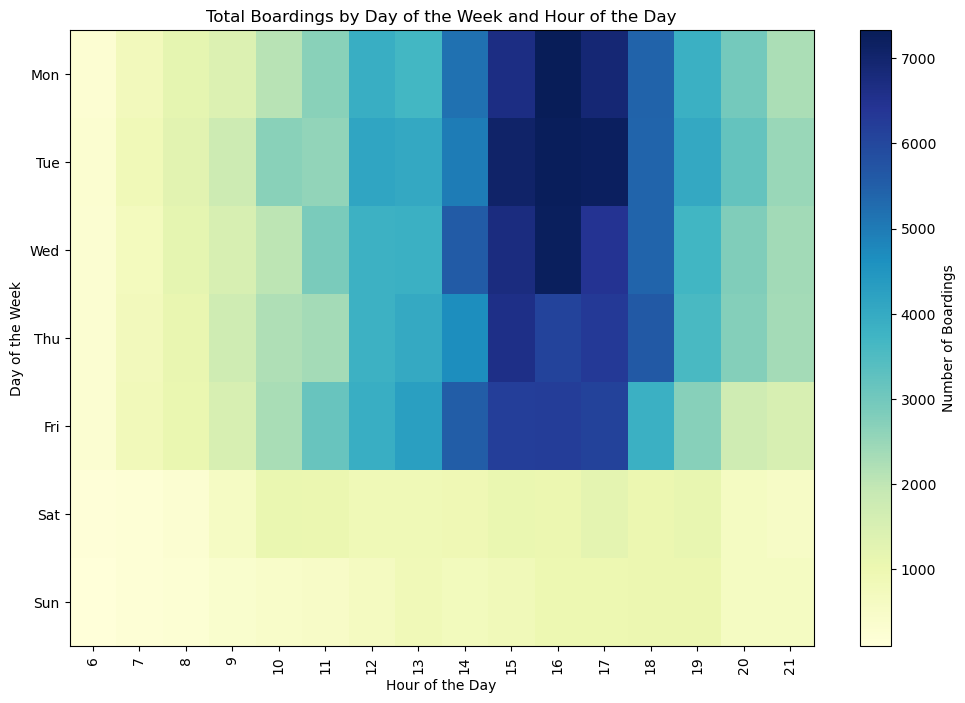

In [32]:
#pivot the data to create a matrix for the heatmap
heatmap_data = cap.pivot_table(index='day_of_week', columns='hour_of_day', values='boarding', aggfunc='sum')

# Reorder the days of the week
days_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
heatmap_data = heatmap_data.reindex(days_order)

# Plot the heatmap using Matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(heatmap_data, aspect='auto', cmap='YlGnBu')
plt.colorbar(label='Number of Boardings')

# Set the labels for x and y axis
plt.xticks(ticks=np.arange(len(heatmap_data.columns)), labels=heatmap_data.columns, rotation=90)
plt.yticks(ticks=np.arange(len(heatmap_data.index)), labels=heatmap_data.index)

plt.title('Total Boardings by Day of the Week and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')

plt.show()

Predominantly, people board the bus between 3-6pm on weekdays. Tuesdays during this time window have the most boardings. Interestingly, there are very few boardings in the morning - possibly people are commuting some other way to work or school. Weekends are not popular times at all. 

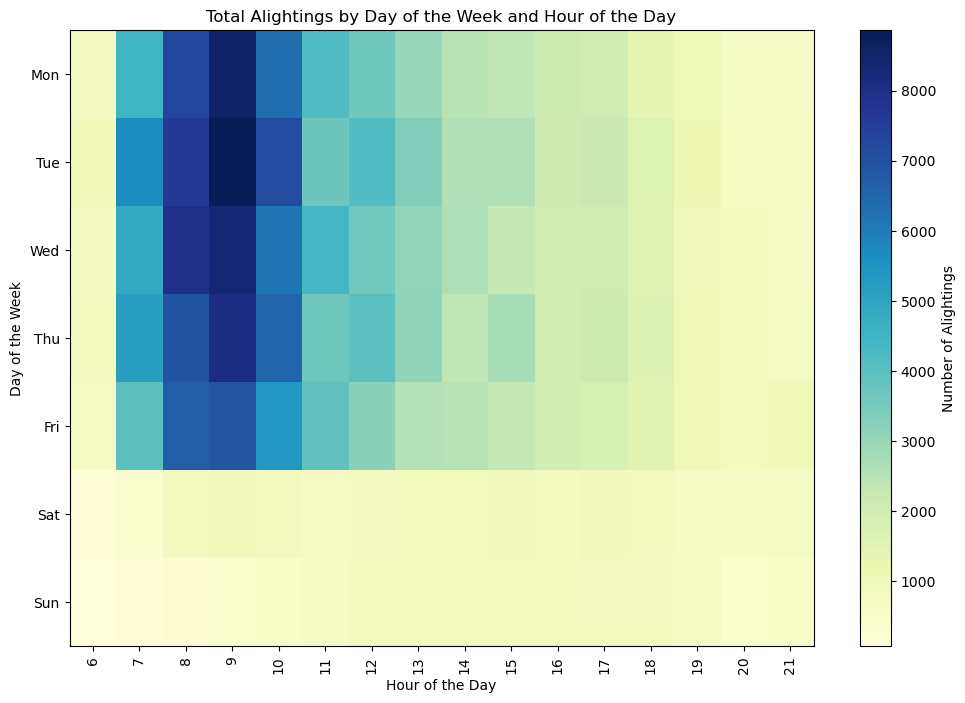

In [33]:
#pivot the data to create a matrix for the heatmap
heatmap_data = cap.pivot_table(index='day_of_week', columns='hour_of_day', values='alighting', aggfunc='sum')

# Reorder the days of the week
days_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
heatmap_data = heatmap_data.reindex(days_order)

# Plot the heatmap using Matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(heatmap_data, aspect='auto', cmap='YlGnBu')
plt.colorbar(label='Number of Alightings')

# Set the labels for x and y axis
plt.xticks(ticks=np.arange(len(heatmap_data.columns)), labels=heatmap_data.columns, rotation=90)
plt.yticks(ticks=np.arange(len(heatmap_data.index)), labels=heatmap_data.index)

plt.title('Total Alightings by Day of the Week and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')

plt.show()

Predominantly, people deboard/alight from the bus between 7-10am on Weekdays. Tuesdays at 9am are a hot time for CapMetro. Weekends are not popular times at all. 

### Temperature and Ridership 

/var/folders/22/q2j3xwyd63q79r8qlb0118_h0000gn/T/ipykernel_49731/845002105.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_grouped = cap.groupby('temp_bin')['boarding'].mean()


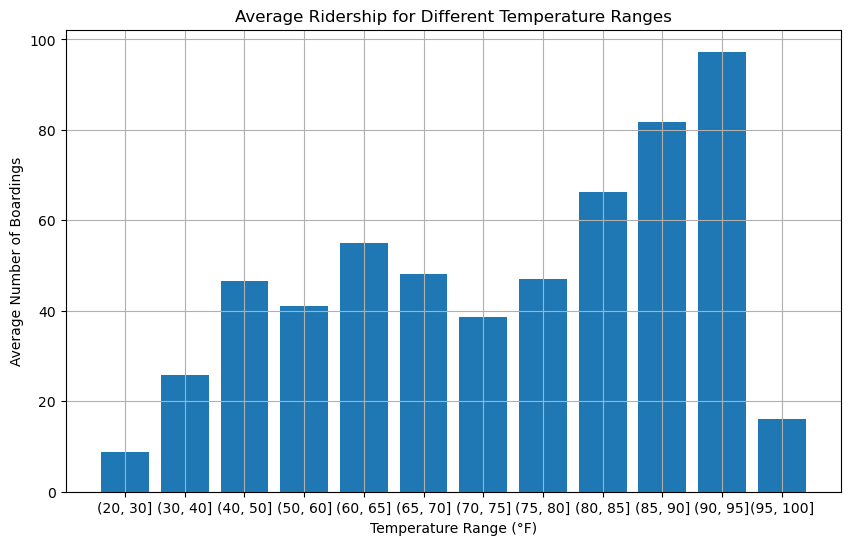

In [44]:
#bin the temperatures first
cap['temp_bin'] = pd.cut(cap['temperature'], \
                         bins=[10, 20, 30, 40, 50, 60, 65, 70, 75, 80, 85, 90, 95, 100, 110])

# Calculate average boardings per temperature range
temp_grouped = cap.groupby('temp_bin')['boarding'].mean()

# Bar plot for average ridership per temperature range
plt.figure(figsize=(10, 6))
plt.bar(temp_grouped.index.astype(str), temp_grouped)
plt.title('Average Ridership for Different Temperature Ranges')
plt.xlabel('Temperature Range (°F)')
plt.ylabel('Average Number of Boardings')
plt.grid(True)
plt.show()

Clearly, no one likes to ride the bus in 90+ F days or <40F days. Between 40-80F days, ridership is somewhat stable.
It rises quite a big in the 80-95 F days.

### Ridership Across Months in the Data Set (Sep - Nov 2018)

/var/folders/22/q2j3xwyd63q79r8qlb0118_h0000gn/T/ipykernel_49731/2893479037.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_grouped = cap.groupby('month')['boarding'].mean()
/var/folders/22/q2j3xwyd63q79r8qlb0118_h0000gn/T/ipykernel_49731/2893479037.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = cap.groupby('month')[['boarding','alighting']].agg('sum')


Text(0, 0.5, 'Number of People Boarding or Alighting')

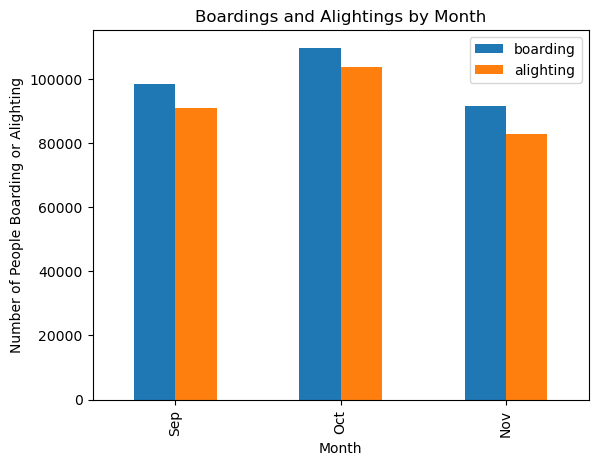

In [64]:
months_abbr = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert 'month' to a categorical type with an ordered category
cap['month'] = pd.Categorical(cap['month'], categories=months_abbr, ordered=True)

month_grouped = cap.groupby('month')['boarding'].mean()

grouped = cap.groupby('month')[['boarding','alighting']].agg('sum')
grouped = grouped[ grouped['boarding'] != 0]
grouped.plot(kind='bar')
plt.title('Boardings and Alightings by Month')
plt.xlabel('Month')
plt.ylabel('Number of People Boarding or Alighting')



Ridership is relatively stable across months, although there's a slight drop in November, perhaps because the weather is getting colder, or people are going home for the holidays. 

### Relationship Between "Special" Days and Ridership - UT Football Home Game Days and Holidays
Let's see if football game days play a role in ridership, since the data is from Fall 2018 and for in and around the UT Area. I will also look at holidays. 

In [41]:
#I got the list of UT home game days from 2018 online. I am not using a csv and instead manually created
#a set in order to avoid having another file upload to Github. 

# Extract the date from the 'timestamp' index in cap
cap['date'] = cap.index.date

#create a set of game days for UT football home games 
game_days = {
    datetime.strptime('9/8/2018', '%m/%d/%Y').date(),
    datetime.strptime('9/15/2018', '%m/%d/%Y').date(),
    datetime.strptime('9/22/2018', '%m/%d/%Y').date(),
    datetime.strptime('10/13/2018', '%m/%d/%Y').date(),
    datetime.strptime('11/3/2018', '%m/%d/%Y').date(),
    datetime.strptime('11/17/2018', '%m/%d/%Y').date()
}

#create a new column in cap to indicate whether each date is a game day
cap['game_day'] = cap['date'].isin(game_days)


#same thing for holidays 
holidays = {
    datetime.strptime('9/3/2018', '%m/%d/%Y').date(), #Labor day 
    datetime.strptime('11/12/2018', '%m/%d/%Y').date(), #Veteran's day
    datetime.strptime('11/22/2018', '%m/%d/%Y').date() #Thanksgiving
}

cap['holiday'] = cap['date'].isin(holidays)

#drop the temporary 'date' column
cap.drop(columns=['date'], inplace=True)


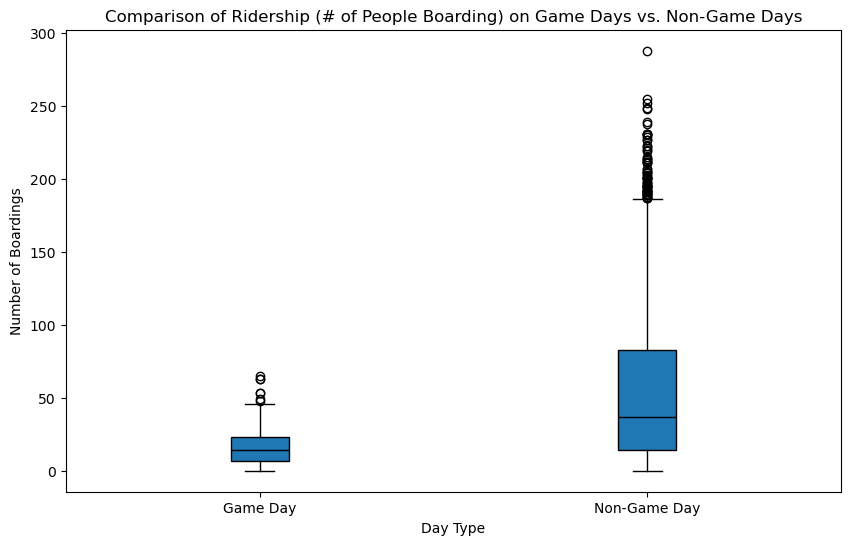

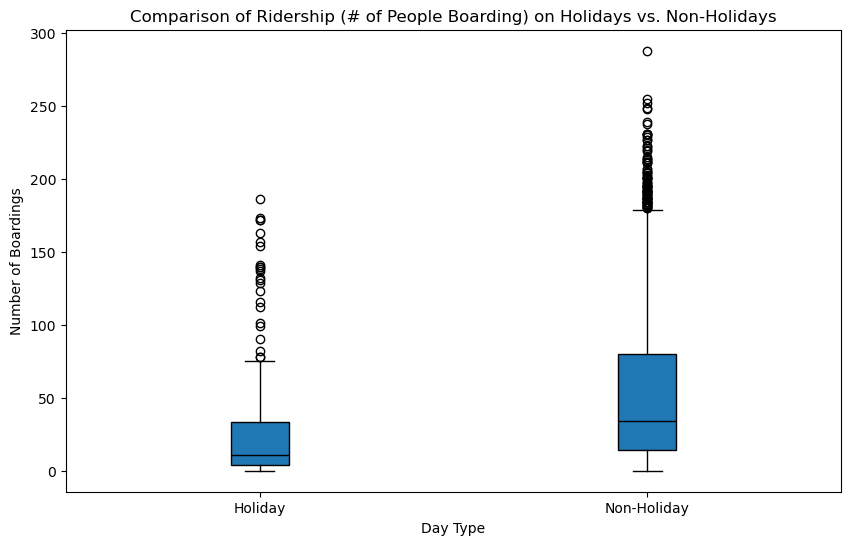

In [42]:
# Create the figure and axis
plt.figure(figsize=(10, 6))

# Box plot for game days
plt.boxplot(
    [cap[cap['game_day']]['boarding'], cap[~cap['game_day']]['boarding']],
    labels=['Game Day', 'Non-Game Day'],
    patch_artist=True,  # To fill the box with color
    medianprops=dict(color='black')  # Median line color
)

# Add titles and labels
plt.title('Comparison of Ridership (# of People Boarding) on Game Days vs. Non-Game Days')
plt.xlabel('Day Type')
plt.ylabel('Number of Boardings')

plt.show()

#########################################

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Box plot for game days
plt.boxplot(
    [cap[cap['holiday']]['boarding'], cap[~cap['holiday']]['boarding']],
    labels=['Holiday', 'Non-Holiday'],
    patch_artist=True,  # To fill the box with color
    medianprops=dict(color='black')  # Median line color
)

# Add titles and labels
plt.title('Comparison of Ridership (# of People Boarding) on Holidays vs. Non-Holidays')
plt.xlabel('Day Type')
plt.ylabel('Number of Boardings')

plt.show()

As you can see, there is not a huge difference between number of boardings on game days vs. 
non-game days based on this scatterplot. Slightly fewer people ride the bus on those days. The same thing exists for holidays vs. non-holidays. For brevity, I have not shown the alighting plot, but it is very similar. 
It should be noted that this is probably not an accurate representation of ridership on game days and holidays, since there are very few holidays and game days in the data set. For a better representation we should find data from multiple years and combine. 